In [1]:
include("IsingCore.jl")
using .IsingCore
using StochasticAD
using CairoMakie
using Optimisers
using LinearAlgebra
using Statistics: mean, std

println(names(IsingCore))

[:IsingCore, :calc_energy, :calc_mag, :independent_sampler, :initial_state, :ising_model, :ising_model_manyT, :ising_model_remc, :metropolis_sampler, :set_temperature_ladder]


In [2]:
N = 24
T = 2.5
move = independent_sampler

function check_acceptance_probs(T, move, method)
    config = IsingCore.initial_state(N)
    # outputs: E, M, C, X, configs
    _, _, _, _, T_replicas, exchange_prob_means = IsingCore.ising_model_remc(N, T, config, move; is_accept_probs=true, method=method)
    return T_replicas, exchange_prob_means
end

check_acceptance_probs (generic function with 1 method)

In [3]:
T_replicas, exchange_prob_means = check_acceptance_probs(T, move, :geom)

([1.5, 1.568405867243287, 1.6399313096021118, 1.7147185919039465, 1.7929164668088649, 1.8746804706800853, 1.9601732329473684, 2.049564799578597, 2.1430329713029224, 2.240763657258212, 2.342951244766204, 2.4497989859708516, 2.561519402108893, 2.678334706216736, 2.800477245114436, 2.9281899615458666, 3.061726877394288, 3.2013535989344466, 3.3473478451261327, 3.5], [0.7279730895389779, 0.7179433948924522, 0.6278602564773149, 0.6471918705177677, 0.6015012041984477, 0.5632320232716902, 0.5424879438123374, 0.41272128693831966, 0.36125509534546324, 0.3227585203936903, 0.42821041031995416, 0.45525877623851974, 0.5484439040068791, 0.540430292428871, 0.6067015155301879, 0.6081632451542138, 0.6674623234331216, 0.6839418609602416, 0.6883056377322687])

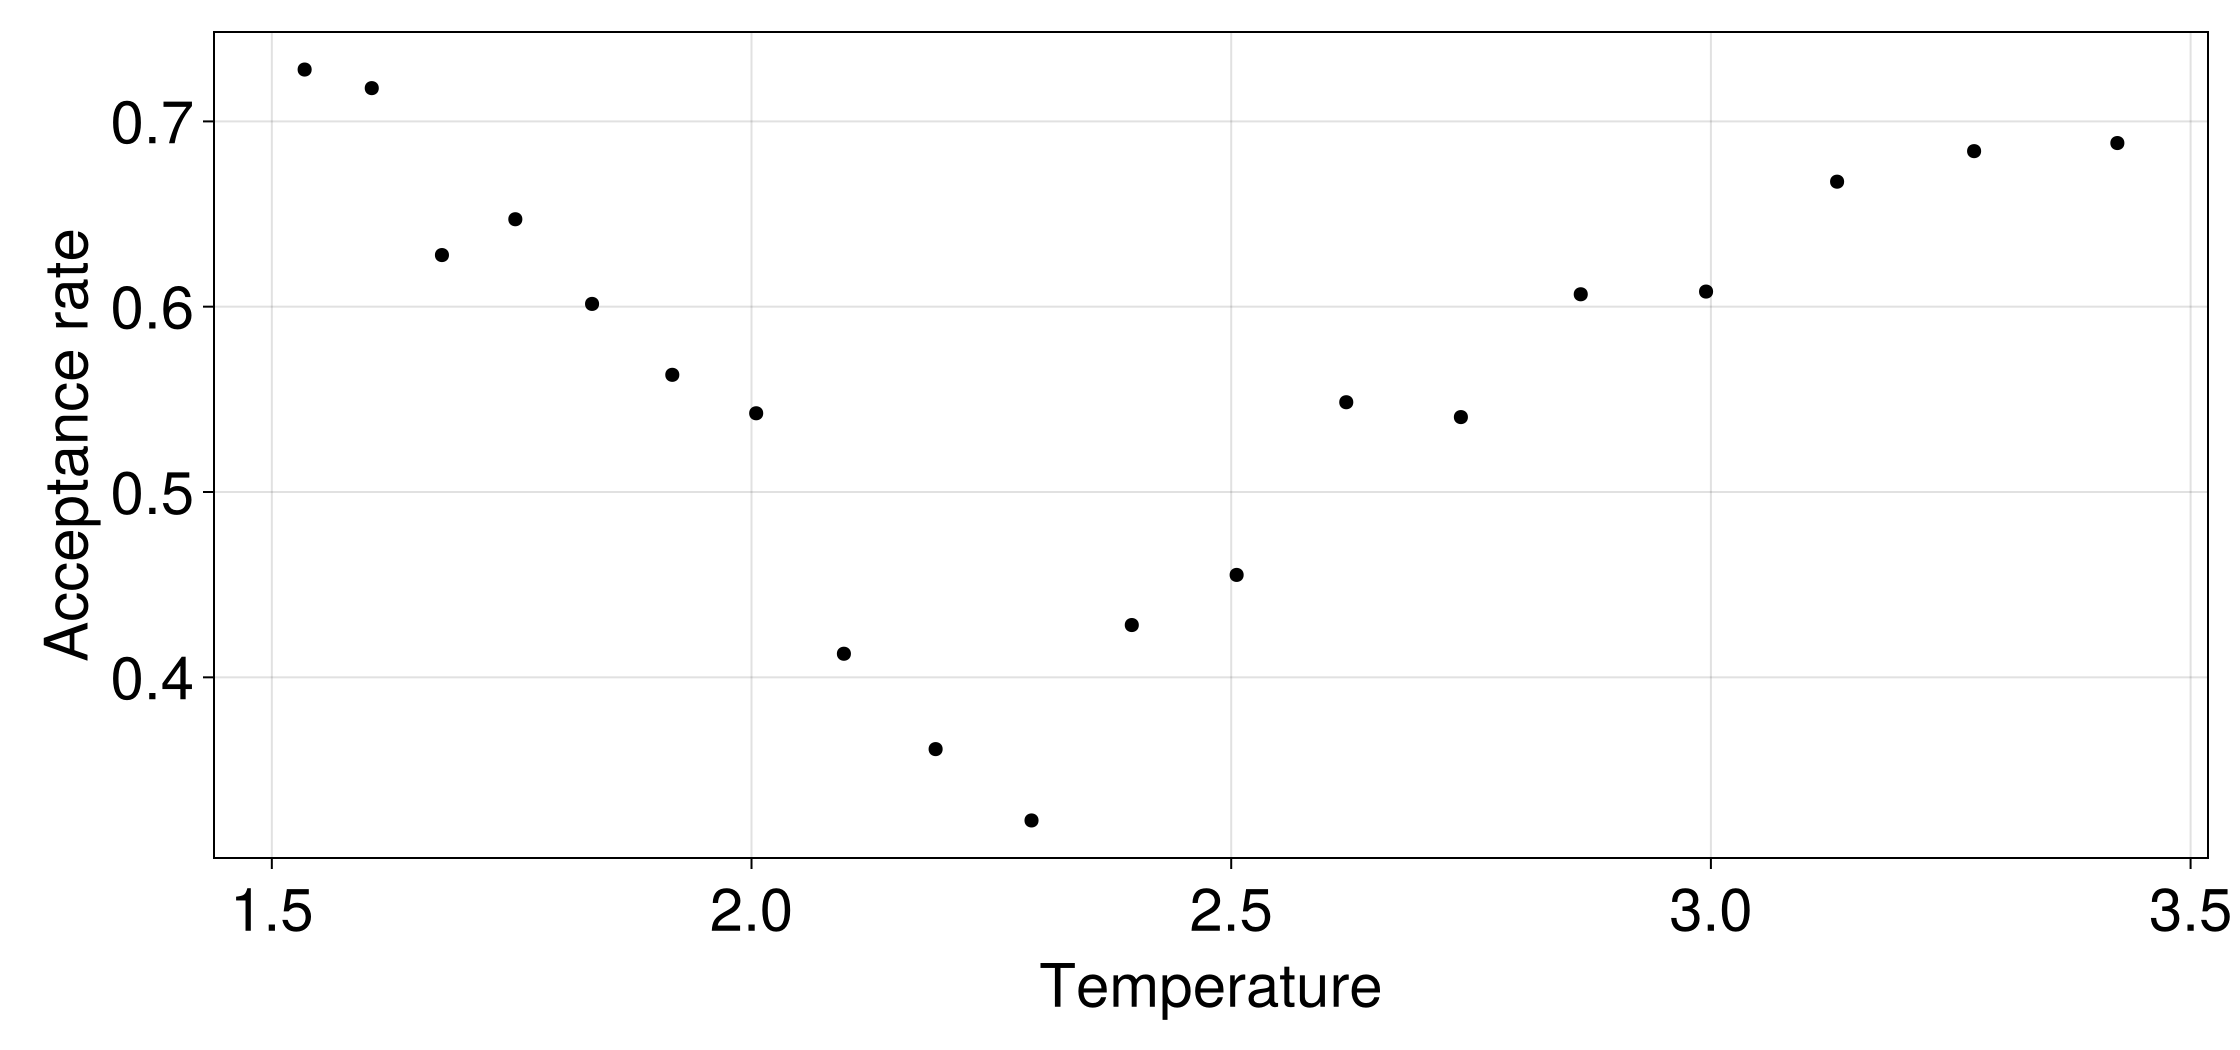

CairoMakie.Screen{IMAGE}


In [4]:
begin
    fig1 = Figure(size=(1120, 525), fontsize = 30)
    ax5 = fig1[1, 1] = Axis(fig1, xlabel="Temperature", ylabel="Acceptance rate")
    
    T_mid = [(T_replicas[i] + T_replicas[i+1]) / 2 for i in 1:length(exchange_prob_means)]
    scatter!(ax5, T_mid, exchange_prob_means, color=:black, markersize=10)
    
    display(fig1)
end

In [5]:
T_replicas, exchange_prob_means = check_acceptance_probs(T, move, :linear)

([1.5, 1.605263157894737, 1.7105263157894737, 1.8157894736842106, 1.9210526315789473, 2.026315789473684, 2.1315789473684212, 2.236842105263158, 2.3421052631578947, 2.4473684210526314, 2.5526315789473686, 2.6578947368421053, 2.763157894736842, 2.8684210526315788, 2.973684210526316, 3.0789473684210527, 3.1842105263157894, 3.289473684210526, 3.3947368421052633, 3.5], [0.6065712606278525, 0.5542813972427192, 0.5170798009515477, 0.5167134959820536, 0.4304582124351195, 0.4361084939896576, 0.35834201282556677, 0.27426046024704553, 0.38461147233370807, 0.465650845032956, 0.5974074980211682, 0.612791788407436, 0.635061887133364, 0.6811823080613286, 0.7545586476648117, 0.7553654768130086, 0.7699563667461021, 0.7869903340538338, 0.788045280553054])

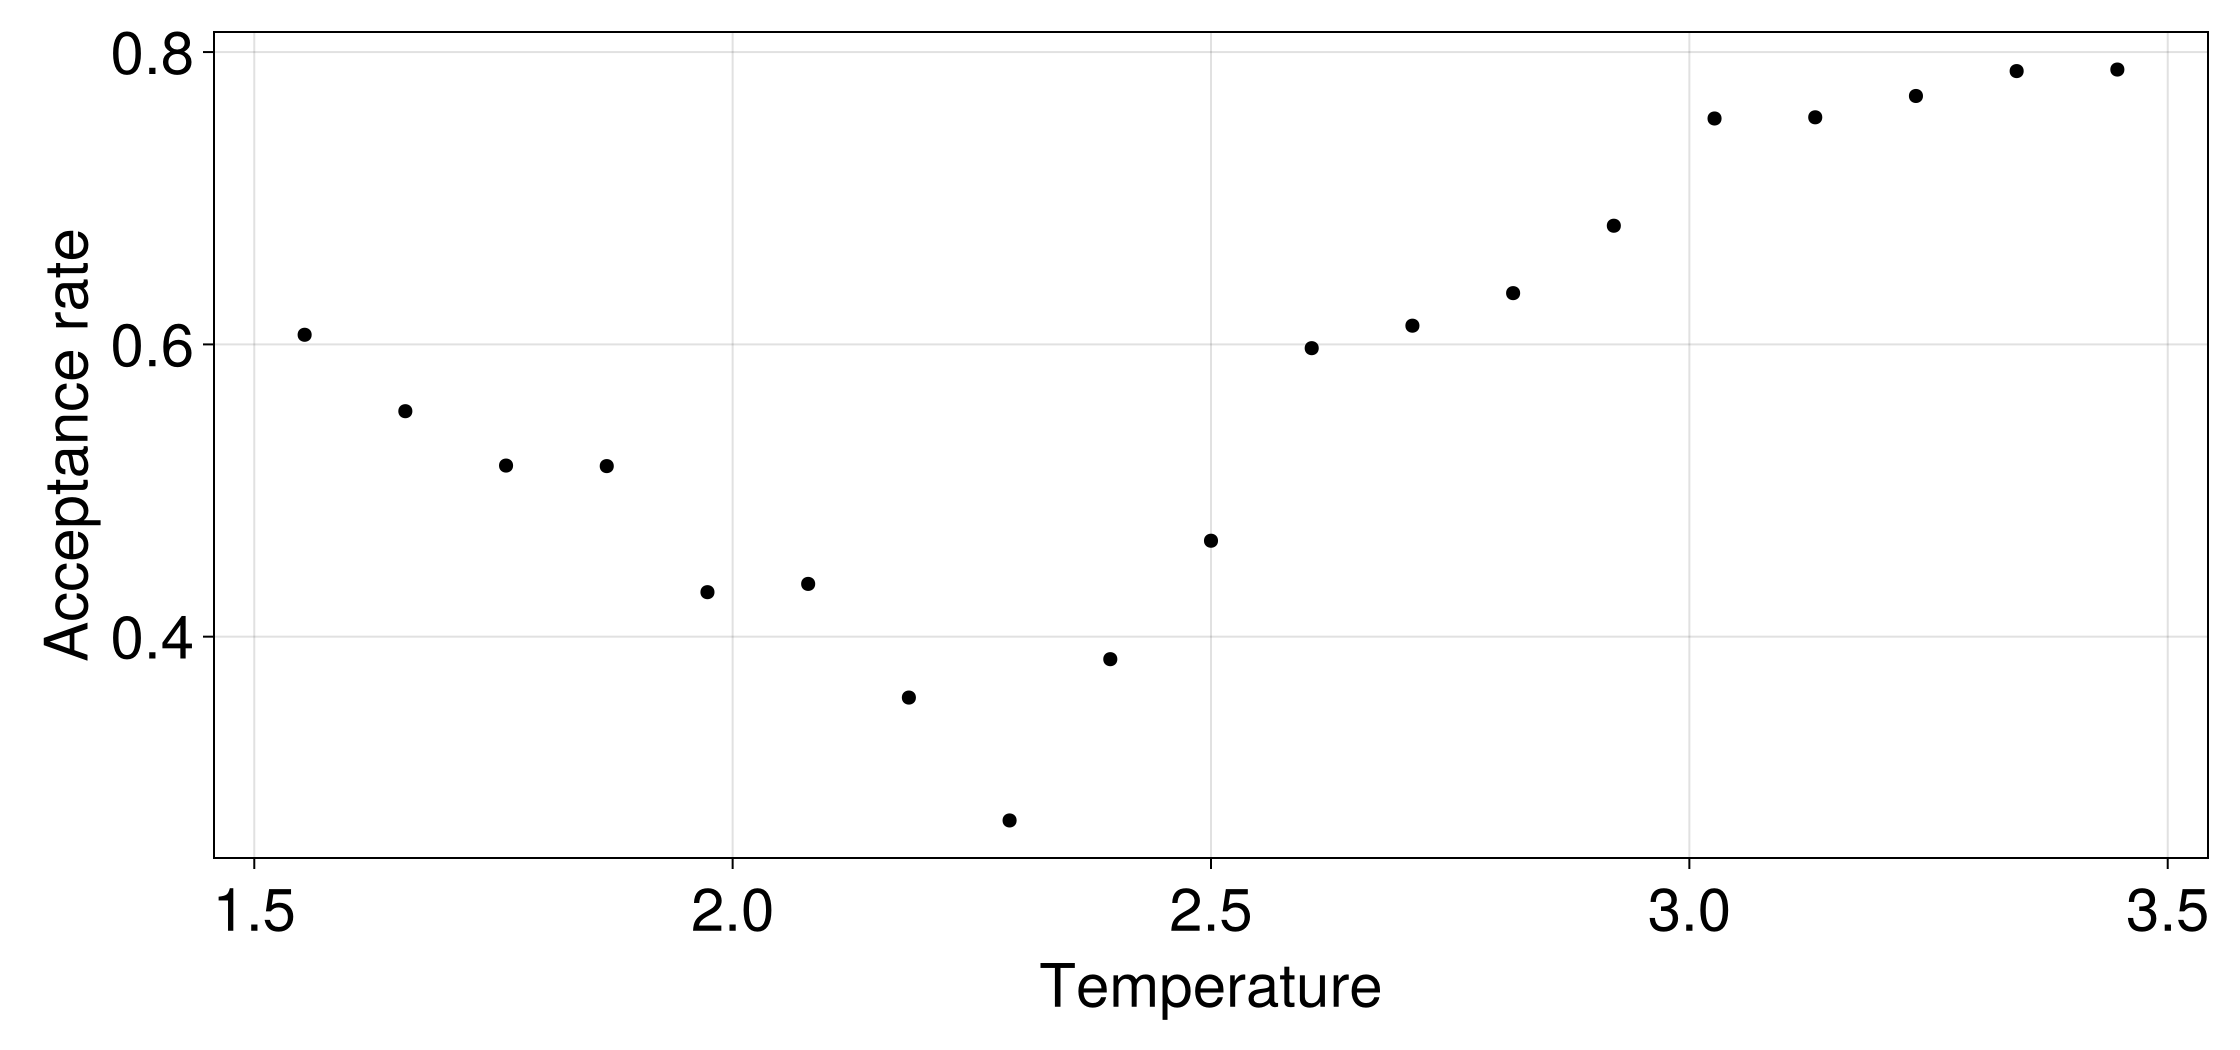

CairoMakie.Screen{IMAGE}


In [6]:
begin
    fig2 = Figure(size=(1120, 525), fontsize = 30)
    ax5 = fig2[1, 1] = Axis(fig2, xlabel="Temperature", ylabel="Acceptance rate")
    
    T_mid = [(T_replicas[i] + T_replicas[i+1]) / 2 for i in 1:length(exchange_prob_means)]
    scatter!(ax5, T_mid, exchange_prob_means, color=:black, markersize=10)
    
    display(fig2)
end